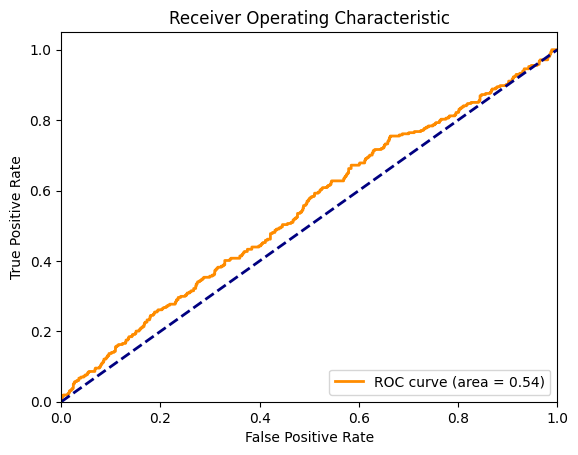

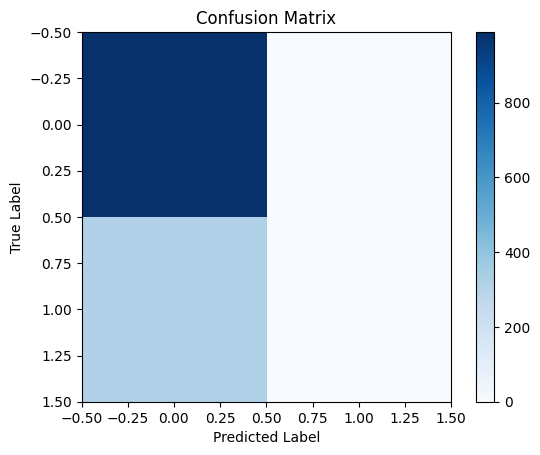

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Загрузка данных
df = pd.read_csv("spotify_top_songs_audio_features.csv")

# Предполагаем, что 'streams' является нашим целевым столбцом
# Предположим, что мы хотим предсказать, превысит ли количество потоков среднее значение
# Создаем целевую переменную: если количество потоков выше среднего, то 1, иначе 0
df['above_avg_streams'] = np.where(df['streams'] > df['streams'].mean(), 1, 0)

# Выбираем признаки для обучения модели
X = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'loudness', 'tempo', 'duration_ms']]
y = df['above_avg_streams']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Получение вероятности принадлежности к классу "1" (выше среднего) для тестового набора
y_prob = model.predict_proba(X_test)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Построение матрицы ошибок
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
